### Test I: Layout Organization Recognition ‚Äì RenAIssance Project
Dataset Description:
- The dataset provided consists of 6 scanned early modern printed sources, each - stored as a separate PDF file. These sources contain:
- OCR-applied text with recognition limitations (e.g., missing letters, incorrect words).
- Editable PDFs which were converted to JPEG images for processing.
- Transcriptions of the first 3 pages per source, which served as reference text.
- Additional untranscribed pages for model evaluation.

Project Goal: The project aimed to detect and classify layout elements (e.g., main_text, heading, drop_cap, author) from historical document scans‚Äîparticularly early modern printed sources. This was part of the RenAIssance Project Test I: Layout Organization Recognition for GSoC 2025.

Model and Approach:
- Utilized a YOLOv8 object detection model with fine-tuning on a custom annotated dataset.
- Dataset included multiple layout classes such as main_text, heading, drop_cap, and author.
- Training was performed over 50 epochs, with careful monitoring of losses and evaluation metrics.
- Data was formatted in YOLOv8 and trained using augmentation strategies.


Checking GPU Availability

In [ ]:
!nvidia-smi

Sat Apr  5 05:16:55 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 Installing Required Libraries

In [ ]:
!pip install pymupdf
!pip install ultralytics torch

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20.0/20.0 MB 84.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 993.8/993.8 kB 28.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 83.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 58.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 41.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

Importing Required Libraries

In [ ]:
import os
from PIL import Image
import fitz
from ultralytics import YOLO
import torch
import pandas as pd
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ‚úÖ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Converting All PDF Pages to Images

In [ ]:
pdf_directory = "/content/drive/MyDrive/Lor_YOLO/Pdfs"
image_directory = "/content/drive/MyDrive/Lor_YOLO/pdf_images/"
os.makedirs(image_directory, exist_ok=True)
for filename in os.listdir(pdf_directory):
    if filename.endswith(".pdf"):
        pdf_path = os.path.join(pdf_directory, filename)
        try:
            doc = fitz.open(pdf_path)
            for page_num in range(doc.page_count):
                page = doc[page_num]
                pix = page.get_pixmap(matrix=fitz.Matrix(100 / 72, 100 / 72), dpi=100)
                img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
                img = img.resize((640, 640))
                image_path = os.path.join(image_directory, f"{filename[:-4]}_page_{page_num + 1}.png")
                img.save(image_path, "PNG")
        except Exception as e:
            print(f"Error processing {filename}: {e}")

#### Annotating Document Layouts with Roboflow

After converting PDF pages into uniformly sized PNG images (640√ó640), the next essential step involved annotating document elements using Roboflow.

Defined Classes: The following four classes were used to annotate key components of each historical document layout:
- author: Name or attribution text typically found at the start or end of texts.
- drop_cap: Stylized, oversized letters at the beginning of paragraphs.
- heading: Section or chapter titles.
- main_text: The primary body of content on each page (core focus of Test I).

#### Defining Training Configuration
- To maintain a clean and modular codebase, a configuration class Config was created to store all important file paths and hyperparameters used during model training. This setup allows easy adjustment of parameters and reusability across experiments.

In [ ]:
class Config:
    TRAIN_PATH = '/content/drive/MyDrive/Lor_YOLO/yolo/train'
    VALID_PATH = '/content/drive/MyDrive/Lor_YOLO/yolo/valid'
    TEST_PATH  = '/content/drive/MyDrive/Lor_YOLO/yolo/test'
    DATA_YAML  = '/content/drive/MyDrive/Lor_YOLO/yolo/data.yaml'

    MODEL_TYPE = 'yolov8m.pt'

    # Training Hyperparameters
    EPOCHS = 50
    IMAGE_SIZE = 640
    BATCH_SIZE = 16
    PATIENCE = 20
    LR0 = 0.01
    LRF = 0.01
    MOMENTUM = 0.937
    WEIGHT_DECAY = 0.0005
    WARMUP_EPOCHS = 3.0
    WARMUP_BIASE_LR = 0.1
    FLIPUD = 0.0
    FLIPLR = 0.5
    HSV_H = 0.015
    HSV_S = 0.7
    HSV_V = 0.4
    MIXUP = 0.0
    MOSAIC = 1.0
    COPY_PASTE = 0.0
    WORKERS = 8
    PROJECT_DIR = '/content/drive/MyDrive/Lor_YOLO/yolo/runs'
    EXPERIMENT_NAME = 'layout_detection_gpu'
    DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

ensuring that all the required path exists.

In [ ]:
def verify_paths():
    assert os.path.exists(Config.DATA_YAML), f"Missing data.yaml at {Config.DATA_YAML}"
    assert os.path.exists(Config.TRAIN_PATH), f"Missing train folder"
    assert os.path.exists(Config.VALID_PATH), f"Missing valid folder"
    print("[INFO] All paths verified.")
    print(f"[INFO] Using device: {Config.DEVICE}")

This function is responsible for training the YOLOv8 model using the dataset and training hyperparameters specified in the Config class.
- Loads the YOLO model architecture (e.g., yolov8m.pt)
-Trains the model using:
  
  - The dataset defined in data.yaml
  - Customizable parameters: learning rate, image size, batch size, augmentations, etc.
  - GPU acceleration (if available)

- Logs the progress and saves all training artifacts (metrics, weights, logs) in the specified directory.

In [ ]:
def train_model():
    print("[INFO] Loading model:", Config.MODEL_TYPE)
    model = YOLO(Config.MODEL_TYPE)

    print("[INFO] Starting training on GPU...")
    model.train(
        data=Config.DATA_YAML,
        epochs=Config.EPOCHS,
        imgsz=Config.IMAGE_SIZE,
        batch=Config.BATCH_SIZE,
        patience=Config.PATIENCE,
        lr0=Config.LR0,
        lrf=Config.LRF,
        momentum=Config.MOMENTUM,
        weight_decay=Config.WEIGHT_DECAY,
        warmup_epochs=Config.WARMUP_EPOCHS,
        warmup_bias_lr=Config.WARMUP_BIASE_LR,
        flipud=Config.FLIPUD,
        fliplr=Config.FLIPLR,
        hsv_h=Config.HSV_H,
        hsv_s=Config.HSV_S,
        hsv_v=Config.HSV_V,
        mixup=Config.MIXUP,
        mosaic=Config.MOSAIC,
        copy_paste=Config.COPY_PASTE,
        workers=Config.WORKERS,
        device=Config.DEVICE,
        project=Config.PROJECT_DIR,
        name=Config.EXPERIMENT_NAME,
        verbose=True
    )
    print(f"[SUCCESS] Training complete. Results saved to {Config.PROJECT_DIR}/{Config.EXPERIMENT_NAME}/")

Executing the path verification and model training.

In [ ]:
if __name__ == "__main__":
    verify_paths()
    train_model()

[INFO] All paths verified.
[INFO] Using device: cuda
[INFO] Loading model: yolov8m.pt


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 49.7M/49.7M [00:01<00:00, 45.4MB/s]


[INFO] Starting training on GPU...
Ultralytics 8.3.102 üöÄ Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/Lor_YOLO/yolo/data.yaml, epochs=50, time=None, patience=20, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=/content/drive/MyDrive/Lor_YOLO/yolo/runs, name=layout_detection_gpu, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, sav

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 755k/755k [00:00<00:00, 112MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5.35M/5.35M [00:00<00:00, 268MB/s]


AMP: checks passed ‚úÖ


train: Scanning /content/drive/.shortcut-targets-by-id/1xtGHhzMnvJSXepELtdBN8NSUoug3sSZ9/Lor_YOLO/yolo/train/labels... 48 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [01:03<00:00,  1.33s/it]

train: New cache created: /content/drive/.shortcut-targets-by-id/1xtGHhzMnvJSXepELtdBN8NSUoug3sSZ9/Lor_YOLO/yolo/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/.shortcut-targets-by-id/1xtGHhzMnvJSXepELtdBN8NSUoug3sSZ9/Lor_YOLO/yolo/valid/labels... 6 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6/6 [00:08<00:00,  1.39s/it]

val: New cache created: /content/drive/.shortcut-targets-by-id/1xtGHhzMnvJSXepELtdBN8NSUoug3sSZ9/Lor_YOLO/yolo/valid/labels.cache


Plotting labels to /content/drive/MyDrive/Lor_YOLO/yolo/runs/layout_detection_gpu/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ‚úÖ
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/Lor_YOLO/yolo/runs/layout_detection_gpu
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.32G      1.848      3.901      1.854        175        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:02<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:01<00:00,  1.40s/it]

                   all          6         17    0.00296       0.25     0.0126     0.0103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.34G       2.12      4.084      2.011        127        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  8.73it/s]

                   all          6         17    0.00327       0.25    0.00691    0.00574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.38G      1.937      3.089      1.862        156        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  2.43it/s]

                   all          6         17      0.204      0.458      0.311      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.45G      1.273      1.994      1.422        125        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  4.21it/s]

                   all          6         17       0.74      0.333      0.153     0.0855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.52G      1.255      1.692      1.327        127        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  8.50it/s]

                   all          6         17      0.723      0.392       0.38      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.58G      1.083      1.418      1.234        127        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  4.49it/s]

                   all          6         17      0.677      0.542      0.501      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.79G      1.048      1.361      1.186        174        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  7.42it/s]

                   all          6         17       0.87      0.417      0.633      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.95G     0.9474      1.157      1.144        124        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  7.28it/s]

                   all          6         17      0.824      0.486      0.568      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      7.06G     0.9258      1.158      1.116        151        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  8.59it/s]

                   all          6         17      0.411      0.742      0.634      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.25G     0.9152      1.105      1.106        119        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  8.00it/s]

                   all          6         17      0.555      0.762       0.75      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.32G     0.9391      1.047      1.139        129        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  8.02it/s]

                   all          6         17      0.627      0.766      0.858      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       7.6G     0.8682     0.9882      1.108        117        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  5.77it/s]

                   all          6         17      0.749      0.875      0.901      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.66G     0.9773      1.184      1.166        150        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  8.63it/s]

                   all          6         17      0.586      0.725      0.778      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       7.9G     0.9355      1.023      1.132        130        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  8.20it/s]

                   all          6         17      0.382      0.875      0.649      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.97G      0.887      0.993       1.11        137        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  8.93it/s]

                   all          6         17      0.667      0.517        0.5      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      8.18G      0.922      1.015      1.126        107        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  4.01it/s]

                   all          6         17      0.748      0.542      0.602      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      8.24G      0.893     0.9702      1.099        148        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:02<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  4.65it/s]

                   all          6         17      0.972      0.408      0.595      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.53G     0.9208      1.023      1.128        174        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  8.38it/s]

                   all          6         17      0.636      0.804      0.727      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       8.6G     0.8656      0.939      1.085        140        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  9.28it/s]

                   all          6         17      0.646      0.816      0.874      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      8.71G     0.9083      0.886      1.139         97        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  9.20it/s]

                   all          6         17      0.564      0.904      0.823      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      8.86G     0.8939      1.025      1.137        144        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  6.38it/s]

                   all          6         17      0.628       0.79      0.849      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      9.02G     0.8591     0.8556      1.079        127        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  7.35it/s]

                   all          6         17      0.685      0.903      0.954      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      9.17G     0.8844     0.8537      1.074        158        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  8.07it/s]

                   all          6         17      0.803          1      0.988      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      9.33G     0.8618     0.8821      1.096        142        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  8.91it/s]

                   all          6         17      0.696      0.867       0.88      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       9.5G     0.9195     0.8471       1.09        154        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  9.48it/s]

                   all          6         17      0.619      0.903      0.806      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      9.61G     0.8456     0.9099      1.096        151        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  8.29it/s]

                   all          6         17      0.618      0.605      0.735      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       9.8G     0.8801     0.8176      1.088        154        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  8.79it/s]

                   all          6         17      0.711      0.718      0.754      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      9.91G     0.7558     0.7378      1.037        118        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  8.94it/s]

                   all          6         17      0.617      0.875      0.881      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      10.1G     0.8171     0.7779      1.059        113        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  8.87it/s]

                   all          6         17      0.617      0.875      0.881      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      10.2G     0.8387     0.7681      1.078        142        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  9.28it/s]

                   all          6         17       0.76      0.837      0.906      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      10.4G     0.7649      0.727      1.053        124        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  6.18it/s]


                   all          6         17      0.678       0.87      0.873      0.673

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      10.5G     0.7782     0.7326      1.048        117        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  8.80it/s]

                   all          6         17      0.845      0.768      0.953      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      10.7G     0.7694     0.7018      1.038        129        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  8.55it/s]

                   all          6         17      0.845      0.768      0.953      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      10.8G     0.8027     0.7321      1.049        152        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  9.31it/s]

                   all          6         17      0.795      0.896      0.995      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      10.9G     0.7262     0.6877          1        159        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  4.91it/s]

                   all          6         17      0.912        0.8       0.96      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      11.2G     0.7275      0.682      1.062        111        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  9.01it/s]

                   all          6         17      0.927      0.832      0.972      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      11.3G     0.7363     0.6809      1.034        160        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  8.21it/s]

                   all          6         17      0.927      0.832      0.972      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      11.4G     0.7415     0.6734      1.015        114        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  9.15it/s]

                   all          6         17      0.792      0.895      0.933      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      11.6G     0.7183     0.7049      1.039        125        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  5.64it/s]


                   all          6         17      0.826       0.86      0.933      0.676

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      11.7G     0.7143     0.6168       1.01        165        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  4.58it/s]

                   all          6         17      0.816      0.842      0.933      0.725


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      11.9G     0.7681     0.8249      1.049         71        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  3.18it/s]

                   all          6         17      0.816      0.842      0.933      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50        12G     0.7052     0.7241      1.031         70        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  8.75it/s]

                   all          6         17      0.698      0.968      0.953      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      12.2G     0.7073     0.6626      1.025         68        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  9.16it/s]

                   all          6         17      0.927      0.925      0.995       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      12.3G     0.6791     0.6228      1.025         81        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  6.18it/s]


                   all          6         17      0.915      0.983      0.995       0.72

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      12.5G     0.6711     0.6136      1.025         75        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  8.77it/s]

                   all          6         17      0.915      0.983      0.995       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      12.8G     0.6574     0.5746      1.016         61        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00, 10.31it/s]

                   all          6         17      0.888      0.951      0.995      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      12.8G     0.6639     0.6361      1.009         78        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  9.34it/s]

                   all          6         17      0.936      0.909      0.995      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      12.9G     0.6171     0.5953     0.9597         68        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  9.32it/s]

                   all          6         17      0.942      0.932      0.995      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      13.1G     0.5837     0.5398      1.002         42        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  9.10it/s]

                   all          6         17      0.942      0.932      0.995      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      13.1G     0.6401     0.5417     0.9402         97        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  9.14it/s]

                   all          6         17      0.926      0.987      0.995       0.75



50 epochs completed in 0.048 hours.
Optimizer stripped from /content/drive/MyDrive/Lor_YOLO/yolo/runs/layout_detection_gpu/weights/last.pt, 52.0MB
Optimizer stripped from /content/drive/MyDrive/Lor_YOLO/yolo/runs/layout_detection_gpu/weights/best.pt, 52.0MB

Validating /content/drive/MyDrive/Lor_YOLO/yolo/runs/layout_detection_gpu/weights/best.pt...
Ultralytics 8.3.102 üöÄ Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  7.96it/s]


                   all          6         17      0.925      0.986      0.995       0.75
                author          2          3      0.956          1      0.995      0.722
              drop_cap          2          2      0.866          1      0.995      0.897
               heading          2          2          1      0.946      0.995      0.497
             main_text          6         10      0.879          1      0.995      0.884
Speed: 0.3ms preprocess, 15.0ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to /content/drive/MyDrive/Lor_YOLO/yolo/runs/layout_detection_gpu
[SUCCESS] Training complete. Results saved to /content/drive/MyDrive/Lor_YOLO/yolo/runs/layout_detection_gpu/


#### Evaluating the Model:
Model & Config Verification: Ensures weights and dataset configuration files exist.\
Model Loading: Initializes the YOLO model using the specified checkpoint (e.g., best.pt).\
Evaluation: Runs validation using YOLO‚Äôs built-in .val() method and returns comprehensive metrics.\

Output Metrics:
- mAP@0.5: Mean Average Precision at IoU threshold of 0.5.
- mAP@0.5:0.95: Averaged over thresholds from 0.5 to 0.95 (in steps of 0.05).
- Precision and Recall: Measure correctness and completeness of detection.
- F1 Score: Harmonic mean of precision and recall, indicating balanced performance.

In [ ]:
def evaluate_model():
    assert os.path.exists(Config.MODEL_WEIGHTS), f"Model weights not found at {Config.MODEL_WEIGHTS}"
    assert os.path.exists(Config.DATA_YAML), f"data.yaml not found at {Config.DATA_YAML}"

    print(f"[INFO] Loading model from: {Config.MODEL_WEIGHTS}")
    model = YOLO(Config.MODEL_WEIGHTS)

    print(f"[INFO] Running evaluation on device: {Config.DEVICE}")
    metrics = model.val(
        data=Config.DATA_YAML,
        imgsz=Config.IMAGE_SIZE,
        device=Config.DEVICE,
        split='val',
        save_json=True
    )

    box = metrics.box
    precision = box.mp
    recall = box.mr
    map50 = box.map50
    map5095 = box.map

    print("\n Evaluation Metrics:")
    print(f"  - mAP@0.5:       {map50:.4f}")
    print(f"  - mAP@0.5:0.95:  {map5095:.4f}")
    print(f"  - Precision:     {precision:.4f}")
    print(f"  - Recall:        {recall:.4f}")
    print(f"  - F1 Score:      {(2 * precision * recall) / (precision + recall + 1e-6):.4f}")

if __name__ == "__main__":
    evaluate_model()

[INFO] Loading model from: /content/drive/MyDrive/Lor_YOLO/yolo/runs/layout_detection_gpu/weights/best.pt
[INFO] Running evaluation on device: cuda
Ultralytics 8.3.102 üöÄ Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/drive/.shortcut-targets-by-id/1xtGHhzMnvJSXepELtdBN8NSUoug3sSZ9/Lor_YOLO/yolo/valid/labels.cache... 6 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6/6 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  2.39it/s]


                   all          6         17      0.926      0.986      0.995      0.742
                author          2          3      0.957          1      0.995       0.69
              drop_cap          2          2      0.866          1      0.995      0.897
               heading          2          2          1      0.946      0.995      0.497
             main_text          6         10      0.879          1      0.995      0.884
Speed: 0.3ms preprocess, 38.7ms inference, 0.0ms loss, 1.9ms postprocess per image
Saving runs/detect/val4/predictions.json...
Results saved to runs/detect/val4

‚úÖ Evaluation Metrics:
  - mAP@0.5:       0.9950
  - mAP@0.5:0.95:  0.7419
  - Precision:     0.9256
  - Recall:        0.9865
  - F1 Score:      0.9551


#### Model Evaluation Results

- After training the layout detection model using YOLOv8, we evaluated its performance on the validation set. The model checkpoint used was the `best.pt` file saved during training.  

#### Overall Performance
| Metric         | Value   |
|----------------|---------|
| mAP@0.5        | 0.9950  |
| mAP@0.5:0.95   | 0.7419  |
| Precision      | 0.9256  |
| Recall         | 0.9865  |
| F1 Score       | 0.9551  |

### Per-Class Results

| Class       | Precision | Recall | mAP@0.5 | mAP@0.5:0.95 |
|-------------|-----------|--------|---------|--------------|
| author      | 0.957     | 1.000  | 0.995   | 0.690        |
| drop_cap    | 0.866     | 1.000  | 0.995   | 0.897        |
| heading     | 1.000     | 0.946  | 0.995   | 0.497        |
| main_text   | 0.879     | 1.000  | 0.995   | 0.884        |


#### Summary
The YOLOv8 model demonstrates **excellent detection accuracy**, particularly for `main_text` and `drop_cap`. While `heading` has slightly lower mAP@0.5:0.95, the overall performance is strong, making this a reliable layout recognition model for early modern printed documents.

running inference on test image using trained yolov8 model.

In [ ]:
MODEL_PATH = "/content/drive/MyDrive/Lor_YOLO/yolo/runs/layout_detection_gpu/weights/best.pt"
TEST_DIR = "/content/drive/MyDrive/Lor_YOLO/yolo/test/images"
SAVE_DIR = "/content/drive/MyDrive/Lor_YOLO/yolo/runs/test_predictions"
DEVICE = "cuda"
os.makedirs(SAVE_DIR, exist_ok=True)

def predict_on_test_images():
    print(f"[INFO] Loading model from: {MODEL_PATH}")
    model = YOLO(MODEL_PATH)

    print(f"[INFO] Predicting on test images from: {TEST_DIR}")
    results = model.predict(
        source=TEST_DIR,
        device=DEVICE,
        save=True,
        save_txt=True,
        save_conf=True,
        imgsz=640,
        conf=0.25,
        iou=0.45,
        max_det=100,
        project=SAVE_DIR,  # Use custom directory directly
        name="",           # No subfolder, saves directly to SAVE_DIR
        exist_ok=True,
        verbose=True
    )

    print(f"[INFO] Predictions saved to: {SAVE_DIR}")

if __name__ == "__main__":
    predict_on_test_images()

[INFO] Loading model from: /content/drive/MyDrive/Lor_YOLO/yolo/runs/layout_detection_gpu/weights/best.pt
[INFO] Predicting on test images from: /content/drive/MyDrive/Lor_YOLO/yolo/test/images

image 1/3 /content/drive/MyDrive/Lor_YOLO/yolo/test/images/9_jpg.rf.d5fe472a41905123f32774dc61133f93.jpg: 640x640 5 main_texts, 37.1ms
image 2/3 /content/drive/MyDrive/Lor_YOLO/yolo/test/images/Constituciones-sinodales-Calahorra-1602_page-0006_jpg.rf.bab9f65804bbbaddc79dd361bd7f48c3.jpg: 640x640 1 drop_cap, 1 heading, 3 main_texts, 37.1ms
image 3/3 /content/drive/MyDrive/Lor_YOLO/yolo/test/images/Mendo-Principe-perfecto_page-0003_jpg.rf.3c9ddff757467e60c7cca6a8584d5ab1.jpg: 640x640 1 drop_cap, 1 heading, 2 main_texts, 37.2ms
Speed: 4.3ms preprocess, 37.1ms inference, 146.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/drive/MyDrive/Lor_YOLO/yolo/runs/test_predictions/predict
3 labels saved to /content/drive/MyDrive/Lor_YOLO/yolo/runs/test_predictions/predict/labels

Displaying the predicted images

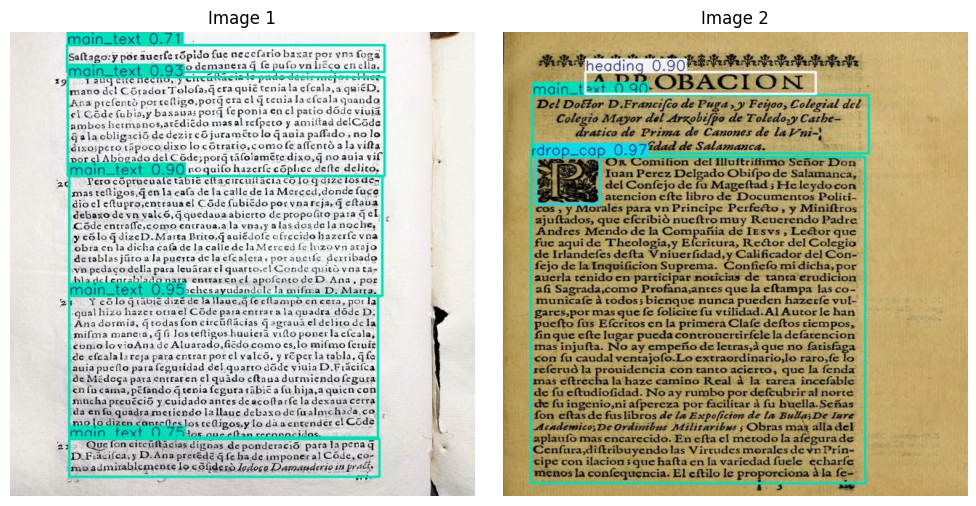

In [ ]:
image1 = Image.open('/content/drive/MyDrive/Lor_YOLO/yolo/runs/test_predictions/predict/9_jpg.rf.d5fe472a41905123f32774dc61133f93.jpg')
image2 = Image.open('/content/drive/MyDrive/Lor_YOLO/yolo/runs/test_predictions/predict/Mendo-Principe-perfecto_page-0003_jpg.rf.3c9ddff757467e60c7cca6a8584d5ab1.jpg')

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image1)
axes[0].axis('off')
axes[0].set_title('Image 1')

axes[1].imshow(image2)
axes[1].axis('off')
axes[1].set_title('Image 2')

plt.tight_layout()
plt.show()

#### Observations from predicted images:
- The model generalizes well across different fonts, layouts, and page structures.
- High confidence values suggest strong predictive power and well-learned features.
- YOLOv8's multi-class capability is demonstrated by simultaneous detection of multiple layout components.
- Bounding boxes do not overlap unnecessarily, preserving structural clarity.

#### Training & Validation Metrics

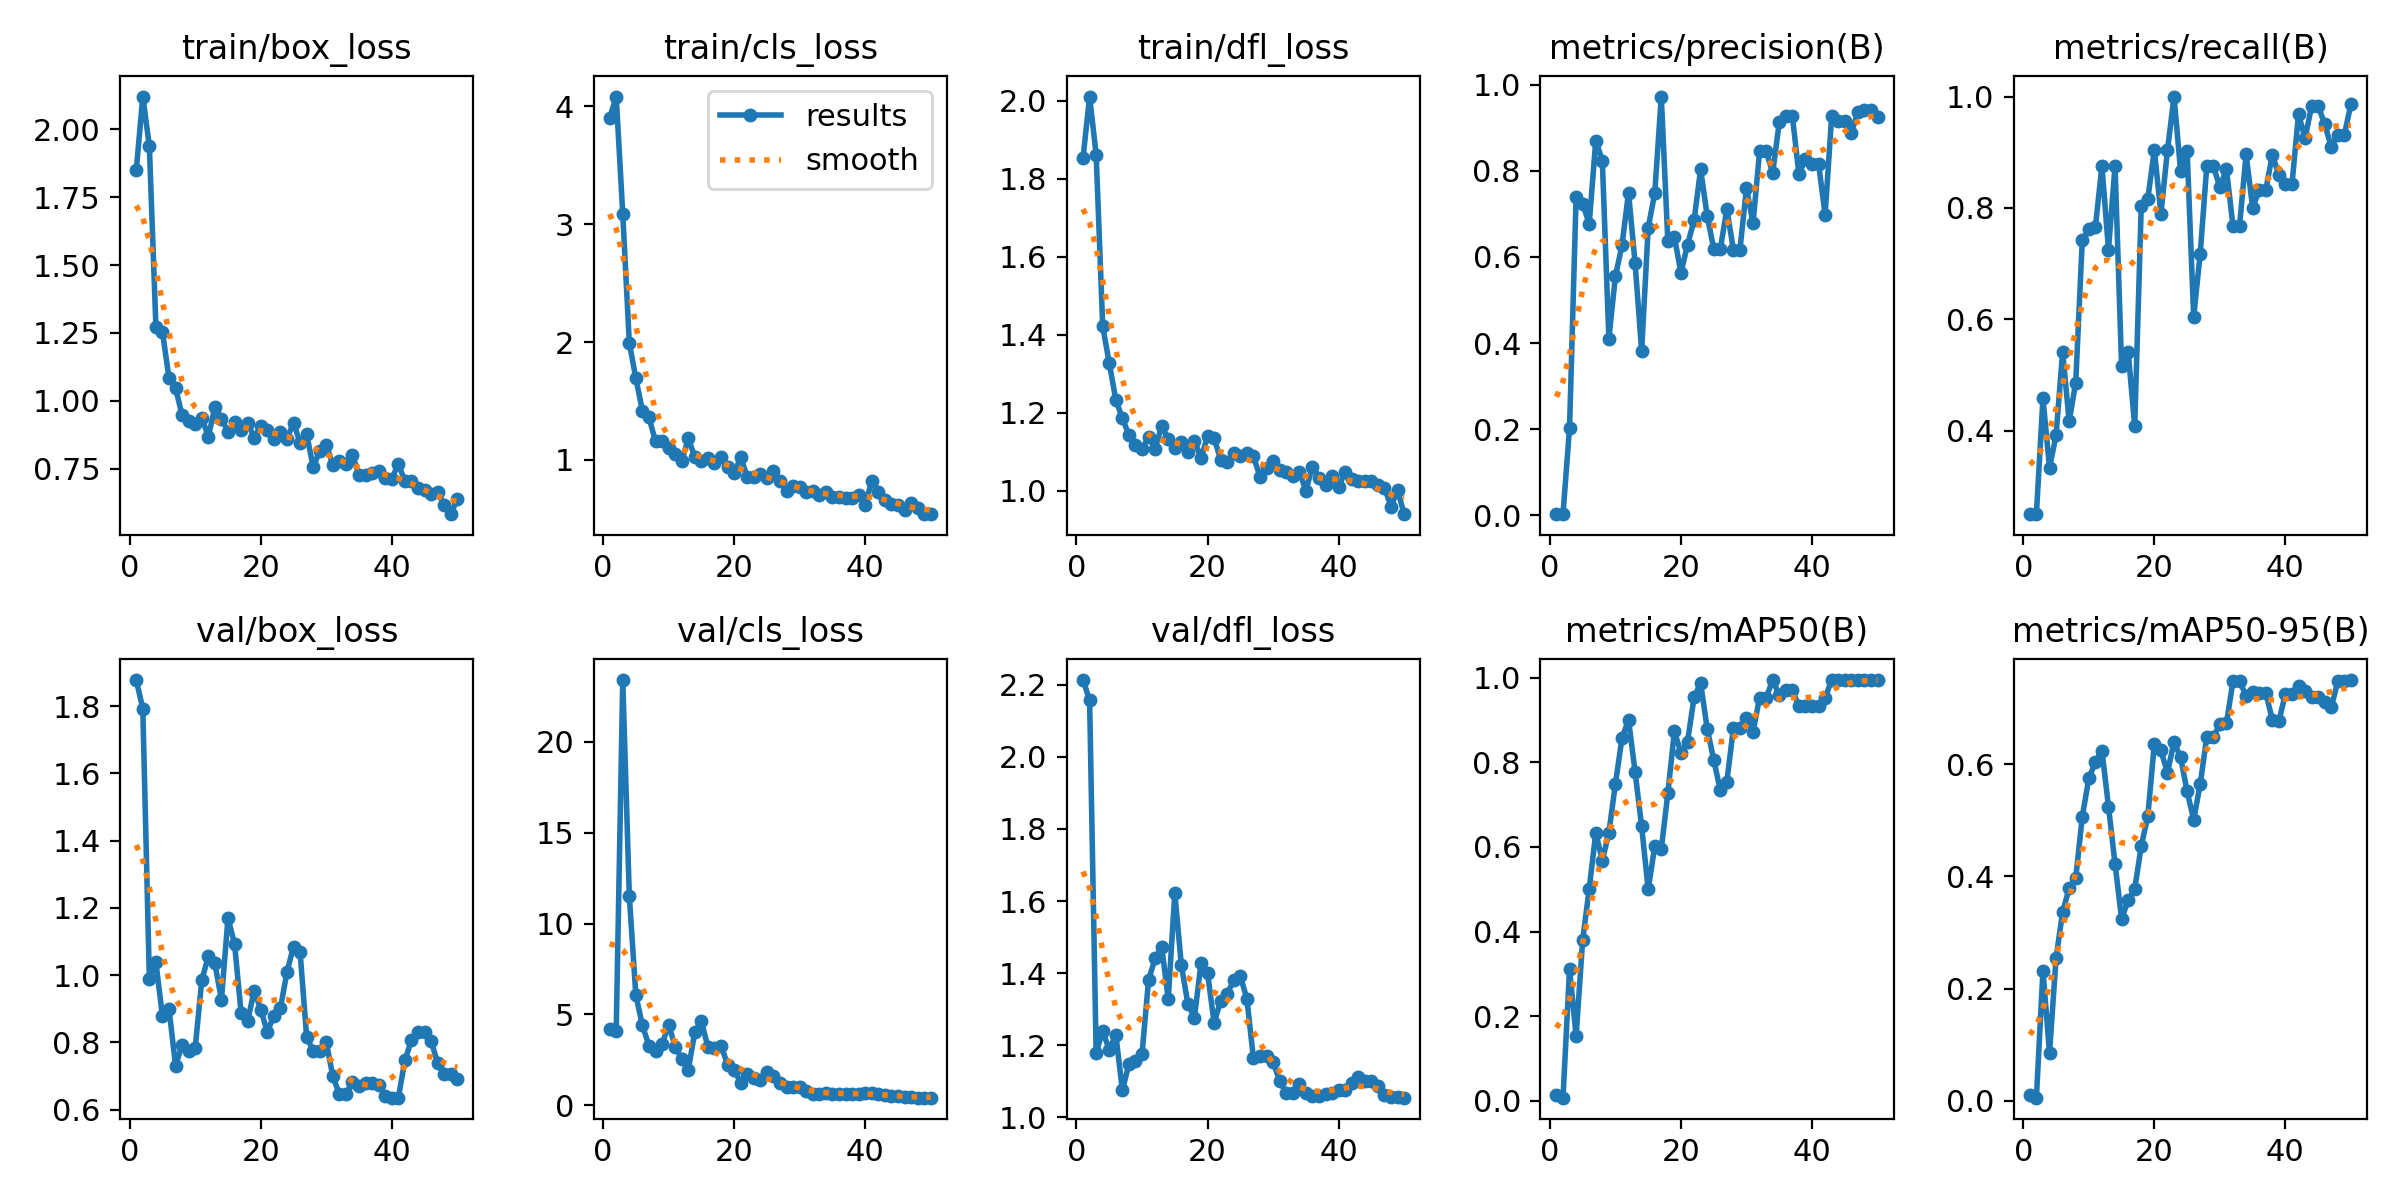

In [ ]:
res = Image.open('/content/drive/MyDrive/Lor_YOLO/yolo/runs/layout_detection_gpu/results.png')
display(res)

#### Training & Validation Metrics ‚Äî Observations:
Loss Trends:
- train/box_loss:	Rapid initial drop and steady decrease toward convergence (starts at ~2.1 to ~0.7).
- train/cls_loss:	High at start (~4), decreases consistently, stabilizing around 0.7.
- train/dfl_loss:	Declines steadily from ~2.0 to ~1.0, showing good localization improvement.

Validation Loss:
- val/box_loss:	Decreases from ~1.8 to ~0.7 but shows slight fluctuation mid-way (some overfitting risk).
- val/cls_loss:	Sharp spike at epoch 2 (~22) then stabilizes below 5 ‚Äî indicating early noise or imbalance.
- val/dfl_loss:	Gradual reduction with mild instability, but trends towards convergence.

Evaluation Metrics:
- metrics/precision(B):	Rises with variance but stabilizes around 0.9‚Äì1.0, indicating highly precise predictions.
- metrics/recall(B):	Gradually improves to nearly 1.0, indicating strong coverage of true positives.
- metrics/mAP50(B):	Improves consistently to ~0.95‚Äì1.0, indicating accurate object detection at IOU=0.5.
- metrics/mAP50-95(B):	Starts low but rises steadily to ~0.75, which reflects robust performance across varying IOU thresholds.

Key Insights:
- Model is learning well: All loss components decrease, and evaluation metrics improve significantly.
- Early overfitting signs: Some mid-epoch fluctuations in validation loss and mAP may hint at overfitting or label noise.
- High precision and recall: Final results show nearly perfect classification and detection capability.
- Sharp recovery from noisy early epochs, especially in val/cls_loss.

Plotting Precision and Recall Confidence curve

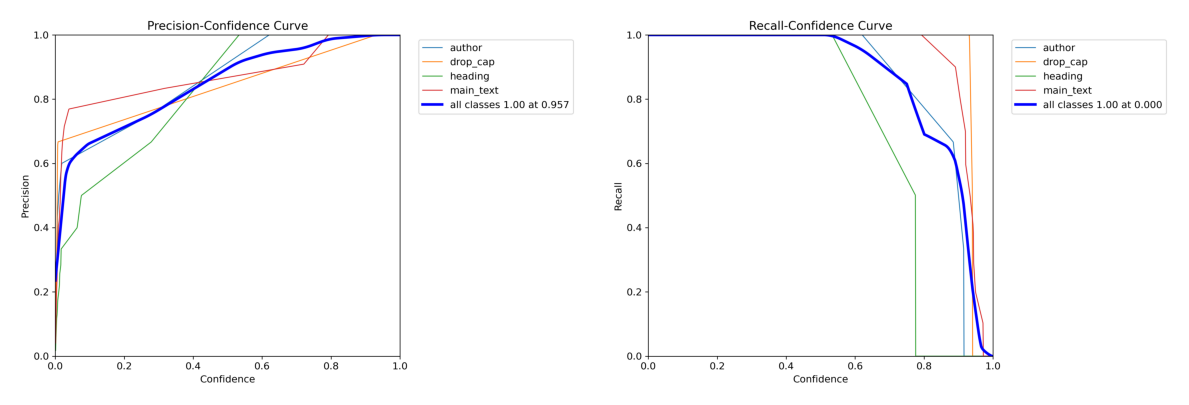

In [ ]:
P_curve = Image.open('/content/drive/MyDrive/Lor_YOLO/yolo/runs/layout_detection_gpu/P_curve.png')
R_curve = Image.open('/content/drive/MyDrive/Lor_YOLO/yolo/runs/layout_detection_gpu/R_curve.png')
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(P_curve)
axes[0].axis('off')
axes[1].imshow(R_curve)
axes[1].axis('off')
plt.tight_layout()
plt.show()

#### Observations:
- main_text and drop_cap show consistently high precision across all confidence thresholds.
- heading class has lower precision at lower confidence values (<0.4), indicating occasional false positives.
- author starts with moderate precision but climbs steadily with increasing confidence.
- All Classes (bold blue line): Achieves 1.00 precision at confidence = 0.957, showing strong model certainty when confident.

Plotting mAP@0.5 & mAP@0.5:0.95 trends to track detection accuracy improvements over training

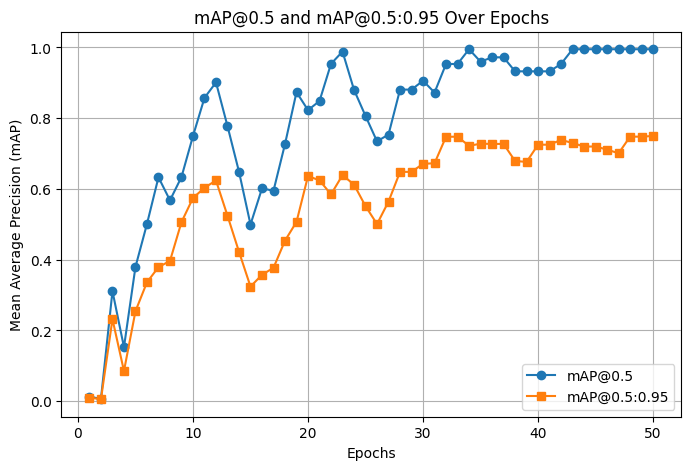

In [ ]:
results_path = "/content/drive/MyDrive/Lor_YOLO/yolo/runs/layout_detection_gpu/results.csv"
df = pd.read_csv(results_path)
plt.figure(figsize=(8,5))
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label="mAP@0.5", marker='o')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label="mAP@0.5:0.95", marker='s')
plt.xlabel("Epochs")
plt.ylabel("Mean Average Precision (mAP)")
plt.title("mAP@0.5 and mAP@0.5:0.95 Over Epochs")
plt.legend()
plt.grid()
plt.show()

#### Observations:
mAP@0.5:
- Shows a steady and sharp rise until epoch 20.
- Peaks at 1.00 around epoch 38 and stays consistently perfect till epoch 50.
- Indicates excellent localization and class detection with lenient IoU.

mAP@0.5:0.95:
- Exhibits more fluctuation, which is expected due to stricter IoU averaging.
- Rises from near 0 to ~0.75 by epoch 50.
- The model shows significant improvements in precise localization over time.

### Next Steps

1. **Integrate with OCR Pipeline**  
   Use the detected layout regions (like `main_text`, `heading`, `drop_cap`, `author`) as input for a text recognition model (e.g., CRNN or TrOCR) to extract structured text.

2. **Train a Text Recognition Model**  
   Implement and fine-tune an OCR model such as:
   - **CRNN** for printed historical fonts.
   - **TrOCR** (Transformer-based OCR) for better handling of noisy or irregular texts.
   - Consider adding language modeling for post-processing.

3. **Experiment with Advanced Layout Models**  
   Try other layout detection models like:
   - **LayoutLMv3** (if using textual + visual features).
   - **Mask2Former + DINOv2** for segmentation-based layout recognition using pretrained ViT backbones.

4. **Enhance Dataset Quality & Quantity**  
   - Increase annotation variety (e.g., more samples of headings, drop caps).
   - Apply more data augmentation (like elastic distortion, blur, yellow tint) to mimic real-world printing defects.

5. **Post-processing & Structuring Output**  
   - Convert predictions into structured formats like **JSON, ALTO-XML**, or **TEI** for downstream historical text analysis or digital archiving.

6. **Deploy the Full Pipeline**  
   Build an end-to-end system that:
   - Accepts scanned historical pages.
   - Detects layout.
   - Extracts text.
   - Outputs cleaned and structured transcriptions.